<a href="https://colab.research.google.com/github/Eshasss/i-love-crispy-laptops/blob/main/CompLing/09_11_Pymorphy_VS_spacy_CompLing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 Импортирование

In [ ]:
!pip install pymorphy2
!pip install typing_extensions==4.7.1 --upgrade --q
!python -m spacy download ru_core_news_sm --q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 31.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=99442f019d06ddb1795bcf3fc5698df4fc2fef2ce95c30be93a818c44742d004
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openai 1.54.4 requires typing-extensions<5,>=4.11, but you have typing-extensions 4.7.1 which is incompatible.
torch 2.5.1+cu121 requires typing-extensions>=4.8.0, but you have typing-extensions 4.7.1 which is incompatible.
typeguard 4.4.1 requires typing-extensions>=4.10.0, but you have typing-extensions 4.7.1 which is incompatible.
     ━

In [ ]:
import json

from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import bigrams
nltk.download('punkt')
nltk.download('stopwords')
sw = stopwords.words('russian')


from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()


import spacy
from spacy.lang.ru.examples import sentences
from spacy import displacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("ru_core_news_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
f = open('voyna-i-mir.txt', encoding = "UTF-8")
data = f.read()

## Задание

### **Тема: Морфология и визуализация**

#### **Данные**

Каждый выбирает себе свою книгу в формате TXT, которая есть в (условно) открытом доступе на [http://lib.ru/](http://lib.ru/): это и следующее задания будут на материале выбранного текста. Давайте брать не рассказы, а большое произведение (книга) $-$ так будет интереснее.
Если ваша любимая книга доступна только в FB2 / EPUB и т.д., то можно конвертировать ее в TXT при помощи любого онлайн-сервиса ([например](https://convertio.co/ru/fb2-txt/)) или самому найти ее в TXT где-нибудь еще.

#### **Задание**

Обработать текст книги с помощью морфологического анализатора, сделать поверхностный анализ и визуализацию.

**Пункты**:

1. Выбрать и сохранить книгу в `.txt`. Проследить, что кодировка UTF-8.
2. Обработать книгу с помощью Spacy:
   - токенизировать и разобрать слова с помощью Spacy
   - сохранить результат в JSON Lines (`.jsonl`), где каждая строчка $-$ это разбор слова в виде словаря<br>`{"lemma": "конь", "word": "коня", "pos": "NOUN"}`
   - создать датафрейм частотности лемм в вашем тексте, отсортировать его по убыванию и сохранить в формате `.csv`. В нем должны быть столбцы _lemma_, _pos_ и _frequency_, а строчки с начальной формой слова, ее частью речи и ее частотностью в тексте. Например, начало вашего CSV файла может выглядеть так:
     ```
     lemma,pos,frequency
     конь,NOUN,25
     ```
   - (не на оценку, опционально)<br>
     замерить время работы на примере небольшого кусочка текста, например, главы
3. Обработать книгу через Pymorphy
   - токенизировать текст с помощью NLTK и убрать стоп-слова
   - разобрать слова с помощью Pymorphy
   - сохранить результат в JSON Lines (`.jsonl`), где каждая строчка $-$ это разбор слова в виде словаря<br>`{"lemma": "конь", "word": "коня", "pos": "NOUN"}`
   - создать датафрейм частотности лемм в вашем тексте, отсортировать его по убыванию и сохранить в формате `.csv`. В нем должны быть столбцы _lemma_, _pos_ и _frequency_, а строчки с начальной формой слова, ее частью речи и частотностью этой леммы в тексте. Например, начало вашего CSV файла может выглядеть так:
     ```
     lemma,pos,frequency
     конь,NOUN,25
     ```
   - (не на оценку, опционально)<br>
     замерить время работы как со Spacy
4. Анализ и визуализация:
   - При помощи pandas посчитать, какую долю слов составляет каждая часть речи. (Например, для глагола $-$ это количество глаголов, деленное на общее число слов в тексте.) Сравнить результаты для Spacy и Pymorphy и прокомментировать их.<br>
     Визуализировать полученные вами подсчеты при помощи подходящего графика.
   - Также при помощи pandas найти топ-20 глаголов и наречий по частотности. Сравнить результаты для Spacy и Pymorphy и прокомментировать их.<br>
     Визуализировать частотность этих двух топов-20 при помощи подходящего графика.
   - Построить облако слов для вашего токенизированного и лемматизированного текста.<br>
     Можно посмотреть [документацию](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud), чтобы исключить одно- или двухбуквенные слова.
5. Посмотреть документацию для NLTK n-грамм (например, `nltk.bigrams`) и составить топ-25 биграмм и триграмм для вашего текста в лемматизированном виде (только леммы, без знаков препинания). Почему получаются именно такие?

**Что должно быть при сдаче?**

1. Тетрадка с кодом, графиками и ответами на вопросы
2. Текст книги
3. Два файла JSON Lines (`.jsonl`) c результатом работы Spacy и Pymorphy
4. Два CSV c частотностью лемм по результатам работы Spacy и Pymorphy

**Подсказка №1**. Используйте `%%time` для замеров времени. Для этого в начале ячейки, где находится то, что вы хотите замерить, напишите `%%time`. Например:

```python
%%time

analysis = m.analyze('Вот так можно замерить время')
```

**Подсказка №2**. Если у вас не импортируется NLTK, попробуйте установить заново, запустить заново тетрадку.

**Подсказка №3**. Если у вас не импортируется Pymorphy, то проверьте вашу версию Python. Если вы работаете с Python версии 3.11+, то устанавливайте `pymorphy3`:

```python
!pip install pymorphy3 --q

from pymorphy3 import MorphAnalyzer
```

Это то же самое, но поддерживаются более новые версии Python. Или работайте в Google Colab: он на версии 3.10.

Если у вас есть вопросы, задавайте в чате или пишите преподавателям

#### Критерии оценки

Является обязательным оформление домашней работы в Jupyter Notebook с ответами на вопросы, комментариями и по PEP-8.

<table>
    <tr><th>Макс. балл</th><th>Критерий</th></tr>
    <tr><td>2.5</td><td>пункт 2 (с двумя файлами)</td></tr>
    <tr><td>2.5</td><td>пункт 3 (с двумя файлами)</td></tr>
    <tr><td>3</td><td>пункт 4 (с графиками и комментариями)</td></tr>
    <tr><td>2</td><td>пункт 5 (с ответом на вопрос)</td></tr>
</table>


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### 2 - 3

In [ ]:
doc_spacy = nlp(data) # Обработка Spacy
doc_spacy = [token for token in doc_spacy if (not token.is_stop)]
data_json_spacy = [{"lemma": doc_spacy[i].lemma_, "word": doc_spacy[i], "pos": doc_spacy[i].pos_}\
                   for i in range(len(doc_spacy)) \
                   if doc_spacy[i].pos_ not in ['X'] and str(doc_spacy[i]).isalpha()]

In [ ]:
latn_tag = morph.parse('mais')[0].tag # Взять тэг инностранных слов
words = [w.lower() for w in word_tokenize(data, language='russian') \
        if w not in sw and w.isalpha() and morph.parse(w)[0].tag != latn_tag] # Обработка nltk
data_json_pym = [{'lemma': morph.parse(words[i])[0].normal_form, 'word': words[i], 'pos': morph.parse(words[i])[0].tag.POS} \
                  for i in range(len(words))]

In [ ]:
def file_maker(type: str, data_json: list): # Записывает jsonl и csv, возращает датафрейм

    df = pd.DataFrame(data_json)
    df_result = (
        df.groupby(['lemma', 'pos'])
        .size()
        .reset_index(name='frequency')
        .sort_values(['lemma', 'frequency'], ascending=[True, False])
        .drop_duplicates(subset='lemma')
    )

    df_result['frequency'] = df_result['lemma'].map(df_result.groupby('lemma')['frequency'].sum())
    df_result = df_result.sort_values('frequency')

    with open(f'data_{type}.jsonl', 'w') as f:
        for row in data_json:
            f.writelines(str(row) + '\n')

    df_result.to_csv(f"data_{type}.csv", index=False)

    return df_result

In [ ]:
df_spacy = file_maker('spacy', data_json_spacy)
df_pym = file_maker('pym', data_json_pym)

### 4

In [ ]:
def pros_count(df: pd.DataFrame): # Считает пропорции разных POS
    prop = (df.groupby('pos')['frequency'].sum()/df['frequency'].sum()).reset_index().sort_values('frequency')
    freq =  prop[prop['frequency'] < 0.04]
    print(len(prop))
    prop.loc[len(prop)] = {'pos': 'other', 'frequency': freq['frequency'].sum()}

    prop = prop.drop(freq.index)
    return prop
pym_prop = pros_count(df_pym)
spacy_prop = pros_count(df_spacy)

17
13


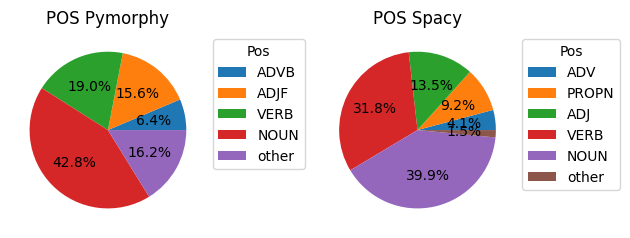

In [ ]:
plt.subplot(1, 2, 1)
plt.pie(pym_prop['frequency'], autopct='%1.1f%%')
plt.legend(pym_prop['pos'], title="Pos", loc="upper left", bbox_to_anchor=(1, 1))
plt.title("POS Pymorphy")

plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 2)
plt.pie(spacy_prop['frequency'], autopct='%1.1f%%')
plt.legend(spacy_prop['pos'], title="Pos",  loc="upper left", bbox_to_anchor=(1, 1))
plt.title("POS Spacy")

plt.tight_layout()
plt.show()

- Примерно равное количество существительных.
SPacy имеет отдельный POS для имен собственных (PROPN).
- Сильно различается число глаголов. Скорее всего, потому что разное определение для глагола. Возможно pymorphy много что поместил в other.
- Также следует пометить, что pymorphy выделил 17 тэгов, а spacy 13. Поэтому возможно у Pymorphy более умный подбор и больше база данных

In [ ]:
verb_spacy = df_spacy[df_spacy['pos'] == 'VERB'].tail(20)  # Топ-20 глаголов и наречий
verb_pym = df_pym[df_pym['pos'] == 'VERB'].tail(20)
adverb_spacy = df_spacy[df_spacy['pos'] == 'ADV'].tail(20)
adverb_pym = df_pym[df_pym['pos'] == 'ADVB'].tail(20)

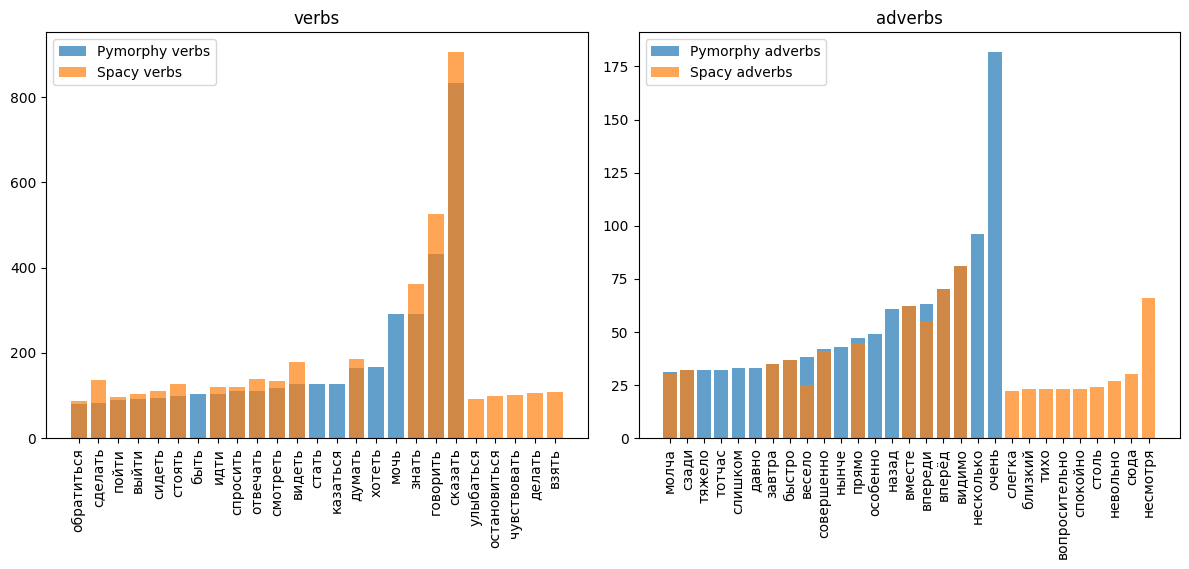

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)

plt.bar('lemma', 'frequency', data=verb_pym, label='Pymorphy verbs', alpha=0.7)
plt.bar('lemma', 'frequency', data=verb_spacy, label='Spacy verbs', alpha=0.7)
plt.xticks(rotation=90)
plt.legend()
plt.title('verbs')

plt.subplot(2, 2, 2)

plt.bar('lemma', 'frequency', data=adverb_pym, label='Pymorphy adverbs', alpha=0.7)
plt.bar('lemma', 'frequency', data=adverb_spacy, label='Spacy adverbs', alpha=0.7)
plt.xticks(rotation=90)
plt.legend()
plt.title('adverbs')



plt.tight_layout()



In [ ]:
nlp('очень')[0].is_stop # Spacy почему-то засичтал некоторые слова как стоп-слова, поэтому так много слов не совпадает!

True

Почти все значения не совпадающие слова( по оси Х)  у spacy меньше чем не совпадающие у pymorphy. Скорее всего это потому из-за того, что я убирала стоп-слова. Видимо у Spacy очень странный и большой список стоп-слов, тк такие слова как "несколько" и очень" не должны убираться. Там, где совпадают слова, разница не очень большая в значениях частотности.

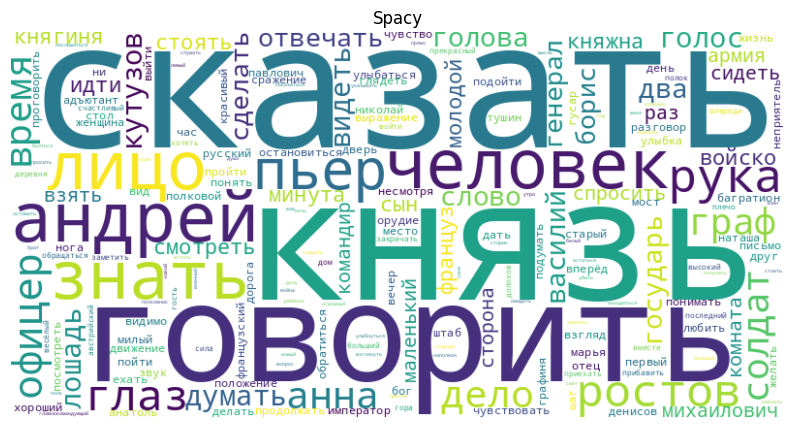

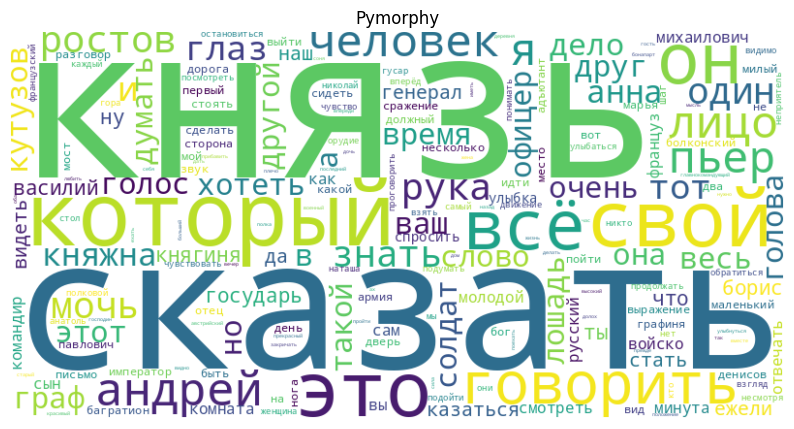

In [ ]:
word_freq_spacy = dict(zip(df_spacy['lemma'], df_spacy['frequency']))
wordcloud_spacy = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_spacy)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_spacy, interpolation='bilinear')
plt.axis('off')
plt.title('Spacy')
word_freq_pym = dict(zip(df_pym['lemma'], df_pym['frequency']))
wordcloud_pym = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_pym)

plt.subplots_adjust(wspace=0.3)

plt.figure(figsize=(10, 6))

plt.imshow(wordcloud_spacy, interpolation='bilinear')
plt.title('Pymorphy')
plt.imshow(wordcloud_pym, interpolation='bilinear')
plt.axis('off')

plt.show()
plt.show()

### 5

In [ ]:
Counter(list(bigrams(words))).most_common(25)

[(('князь', 'андрей'), 285),
 (('князь', 'василий'), 119),
 (('анна', 'михайловна'), 86),
 (('сказал', 'князь'), 81),
 (('анна', 'павловна'), 65),
 (('князя', 'андрея'), 51),
 (('княжна', 'марья'), 48),
 (('полковой', 'командир'), 41),
 (('маленькая', 'княгиня'), 39),
 (('это', 'время'), 33),
 (('всё', 'это'), 32),
 (('князь', 'багратион'), 30),
 (('друг', 'друга'), 28),
 (('князю', 'андрею'), 28),
 (('ваше', 'сиятельство'), 28),
 (('князя', 'василья'), 25),
 (('князя', 'василия'), 24),
 (('молодой', 'человек'), 24),
 (('сказала', 'анна'), 23),
 (('полкового', 'командира'), 23),
 (('сказал', 'ростов'), 23),
 (('я', 'знаю'), 22),
 (('анны', 'павловны'), 21),
 (('всё', 'равно'), 20),
 (('князь', 'ипполит'), 19)]

In [ ]:
Counter(list(nltk.trigrams(words))).most_common(25)

[(('сказал', 'князь', 'андрей'), 46),
 (('сказала', 'анна', 'павловна'), 15),
 (('сказал', 'князь', 'василий'), 13),
 (('в', 'это', 'время'), 12),
 (('сказала', 'анна', 'михайловна'), 8),
 (('князь', 'николай', 'андреевич'), 8),
 (('князь', 'николай', 'андреич'), 8),
 (('тех', 'пор', 'пока'), 7),
 (('сказала', 'маленькая', 'княгиня'), 7),
 (('князь', 'андрей', 'вышел'), 7),
 (('я', 'очень', 'рад'), 6),
 (('княгиня', 'анна', 'михайловна'), 6),
 (('князь', 'андрей', 'остановился'), 6),
 (('продолжал', 'князь', 'андрей'), 5),
 (('продолжал', 'князь', 'василий'), 5),
 (('совершенно', 'всё', 'равно'), 5),
 (('подумал', 'князь', 'андрей'), 5),
 (('думала', 'княжна', 'марья'), 5),
 (('анна', 'павловна', 'шерер'), 4),
 (('князь', 'андрей', 'болконский'), 4),
 (('князь', 'андрей', 'видимо'), 4),
 (('это', 'князь', 'андрей'), 4),
 (('спросил', 'князь', 'андрей'), 4),
 (('графа', 'кирилла', 'владимировича'), 4),
 (('имел', 'вид', 'человека'), 4)]

Получились в основном имя + титул или просто титул. Довольно логично, тк это важные герои романа, которые часто упомянются. Тк часто встречается титул+ имя, также есть биграмма " с левой стороны", где этот князь что-то говорил.В триграммах титул+имя+фамилия, сказал + кто-то